In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.duplicated().sum()

np.int64(25)

In [6]:
df.drop_duplicates(inplace=True)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
df.size

9045

In [8]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [9]:
cor_matrix = df.corr()
cor_matrix

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [10]:
cor = cor_matrix['csMPa'].sort_values(ascending=False)
cor

csMPa               1.000000
cement              0.488283
superplasticizer    0.344209
age                 0.337367
slag                0.103374
flyash             -0.080648
coarseaggregate    -0.144717
fineaggregate      -0.186448
water              -0.269624
Name: csMPa, dtype: float64

In [11]:
X = df.drop(columns=['csMPa'], axis=1)
y = df['csMPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. випадковий ліс

In [13]:
rf_reg = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [14]:
# Розрахункі для тестових даних

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [15]:
print('MSE: ', rf_mse)
print('MAE: ', rf_mae)
print('R2: ', rf_r2) # маємо щтримати значення аналогічне точності

MSE:  27.61734999419001
MAE:  3.4978676036484253
R2:  0.9074252569797012


2. Градієнтний бустінг

In [16]:
gb_reg = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
y_pred_gr = gb_reg.predict(X_test)

In [17]:
# Розрахункі для тестових даних

gb_mse = mean_squared_error(y_test, y_pred_gr)
gb_mae = mean_absolute_error(y_test, y_pred_gr)
gb_r2 = r2_score(y_test, y_pred_gr)

In [18]:
print('MSE: ', gb_mse)
print('MAE: ', gb_mae)
print('R2: ', gb_r2)

MSE:  31.403643872900282
MAE:  4.128914301303752
R2:  0.8947334099018797


3. Лінійна регресія

In [19]:
lr_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)

In [20]:
# Розрахункі для тестових даних

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [21]:
print('MSE: ', lr_mse)
print('MAE: ', lr_mae)
print('R2: ', lr_r2)

MSE:  125.24564805050186
MAE:  8.895256221464194
R2:  0.5801703029028779


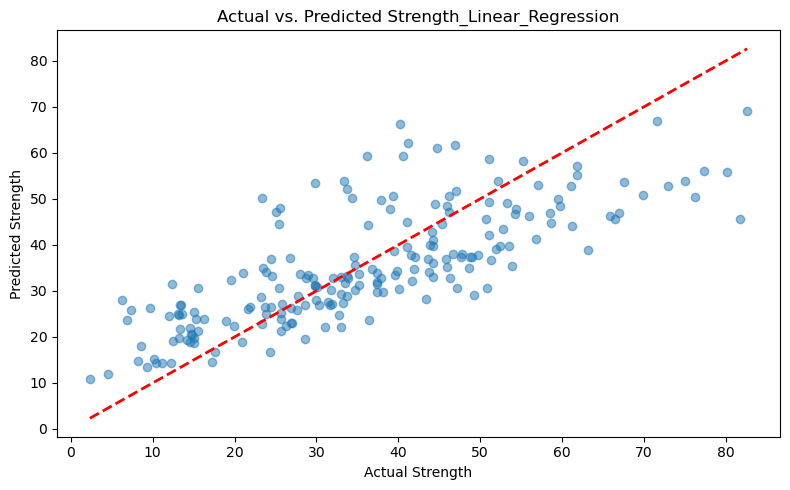

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Strength_Linear_Regression')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.tight_layout()
plt.show()

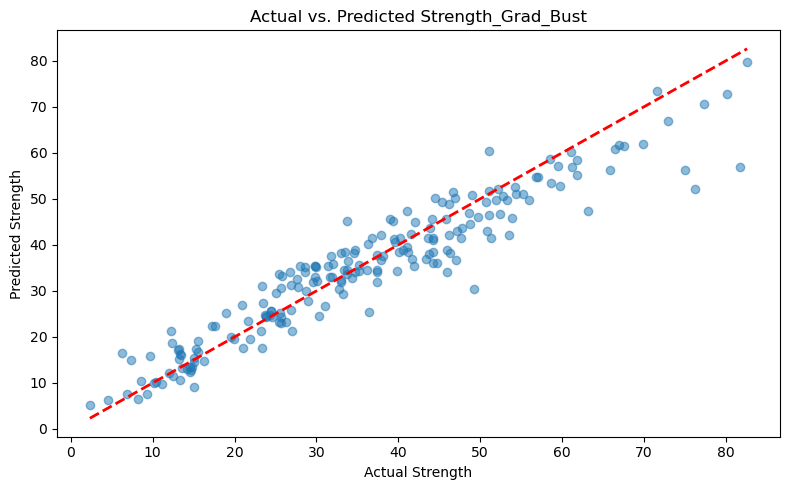

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Actual vs. Predicted Strength_Grad_Bust")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.tight_layout()
plt.show()

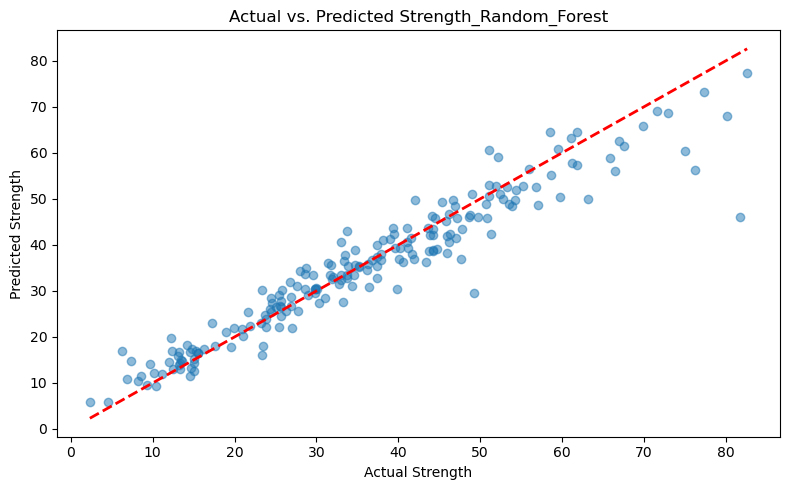

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Actual vs. Predicted Strength_Random_Forest")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.tight_layout()
plt.show()

In [27]:
param_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

In [28]:
rf_reg_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_reg_gs, param_grid=param_rf, cv=3)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_

In [29]:
best_rf_params

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [30]:
rf_optional = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optional.fit(X_train, y_train)
y_pred_rf_optional = rf_optional.predict(X_test)

In [33]:
# Розрахункі для тестових даних

rf_mse = mean_squared_error(y_test, y_pred_rf_optional)
rf_mae = mean_absolute_error(y_test, y_pred_rf_optional)
rf_r2 = r2_score(y_test, y_pred_rf_optional)

In [34]:
print("MSE: ", rf_mse)
print("MAE: ", rf_mae)
print("R2: ", rf_r2)

MSE:  27.075073845061496
MAE:  3.532899735844591
R2:  0.9092429938430198


In [ ]:
# MSE: 27.61734999419001
# MAE: 3.4978676036484253
# R2: 0.9074252569797012

In [36]:
# Вибираємо 10 випадкових індексів
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

# Створюємо датафрейм для порівняння
df_comparison = pd.DataFrame(
    {
        "True Value (y_test)": np.array(y_test)[random_indices],
        "Predicted Value (y_pred_rf_optional)": y_pred_rf_optional[random_indices],
    }
)

# Виводимо таблицю
df_comparison

,True Value (y_test),Predicted Value (y_pred_rf_optional)
0,29.98,30.668800
1,33.40,36.042750
2,28.99,28.867450
3,12.37,17.198550
4,34.57,34.636618
5,63.14,49.912950
6,13.36,13.137950
7,11.17,11.864150
8,29.79,29.406500
9,69.84,66.578100
